In [1]:
# import required libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
import re
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf 
from pathlib import Path
from tqdm import tqdm
from datetime import datetime
from PIL import Image

In [3]:
data_dir = "data/train_val/"

In [4]:
# initialize image sizes and parameters
HEIGHT = 224
WIDTH = 224
CHANNELS = 3
BATCH_SIZE = 32

In [5]:
# a function to show the image batch
def show_batch(image_batch, label_batch=None):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
    #   plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

In [50]:
train_list_ds = tf.data.Dataset.list_files(str(data_dir + "train/stem_rust" +'*/*'))

In [51]:
# read image 
# a function to read data
def read_image(img_path):
    img_loader = tf.io.read_file(img_path)
    img_decoder = tf.image.decode_jpeg(img_loader, channels=CHANNELS)
    img = tf.image.convert_image_dtype(img_decoder, tf.float32)
    img = tf.image.resize(img, [WIDTH, HEIGHT])
    return img

In [52]:
# process paths
def process_path(file_path):
    img = read_image(file_path)
    return img

In [53]:
# using tensorflow dataset.map to create a dataset of image, label pairs
train_labeled_ds = train_list_ds.map(process_path, num_parallel_calls=-1)
train_labeled_ds_copy = train_labeled_ds

In [54]:
image_batch = next(iter(train_labeled_ds_copy.batch(32)))

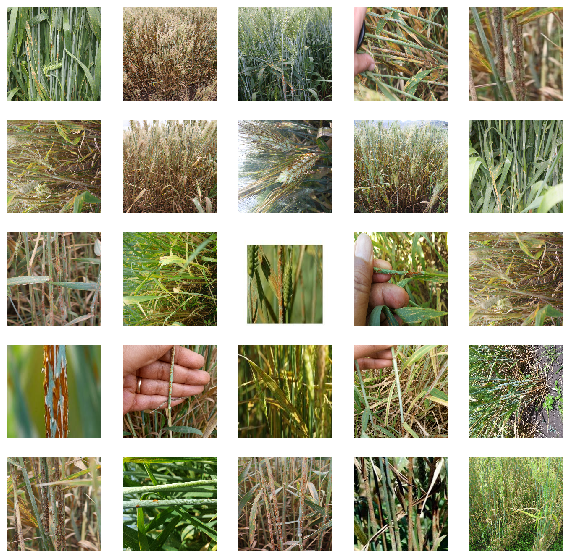

In [55]:
show_batch(image_batch.numpy())

In [56]:
# Flip
def flip(x):
    # x = tf.image.random_flip_left_right(x)
    x = tf.image.random_flip_up_down(x)
    return x

In [57]:
flipped_ds = train_labeled_ds.map(flip, num_parallel_calls=-1)
flipped_ds_copy = flipped_ds

In [58]:
image_batch = next(iter(flipped_ds_copy.batch(32)))

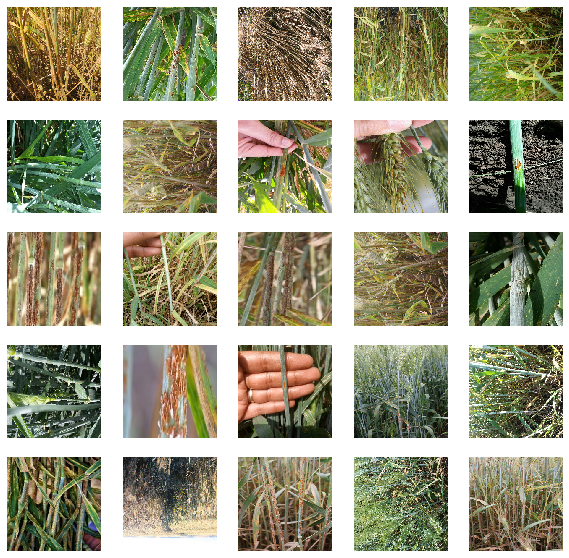

In [59]:
show_batch(image_batch.numpy())

In [60]:
count = 0
for i in tqdm(flipped_ds):
    name = "stem_rust"+str(count)+"_.png"
    plt.imsave("augmented/stem_rust/"+name, i.numpy())
    count += 1


300it [00:12, 24.95it/s]


In [61]:
def rotate(x):
    return tf.image.rot90(x)

In [62]:
rotate_90 = train_labeled_ds.map(rotate, num_parallel_calls=-1)

In [63]:
count = 0
for i in tqdm(rotate_90):
    name = "stem_rust"+str(count)+"_rotate.png"
    plt.imsave("augmented/stem_rust/"+name, i.numpy())
    count += 1


300it [00:11, 25.99it/s]
